# Support Vector Machine

Dataset Selection:
For this assignment, we'll utilize the widely recognized Mushroom Dataset


In [ ]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV

In [ ]:
#load dataset
df=pd.read_csv('mushroom.csv')

In [ ]:
#print top 5
df.head()

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,1167,sunken,scaly,white,no,anise,descending,distant,broad,pink,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,1037,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,...,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
2,309,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,...,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884
3,282,bell,scaly,pink,yes,fishy,notched,close,broad,orange,...,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous,5.226499,20.932692
4,820,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,...,universal,white,none,none,yellow,clustered,urban,poisonous,14.037532,12.545245


In [ ]:
#rows and columns
df.shape

(2000, 26)

Task 1: Exploratory Data Analysis (EDA):


1.	Load the Mushroom dataset and perform fundamental data exploration.


2.	Utilize histograms, box plots, or density plots to understand feature distributions.


3.	Investigate feature correlations to discern relationships within the data.


In [ ]:
#check missing values (0)
df.isnull().sum()

,0
Unnamed: 0,0
cap_shape,0
cap_surface,0
cap_color,0
bruises,0
odor,0
gill_attachment,0
gill_spacing,0
gill_size,0
gill_color,0


In [ ]:
#check duplicate - we have lots of duplicates we have no way just drop it
df.duplicated().sum()

np.int64(1024)

In [ ]:
df = df.drop_duplicates()

In [ ]:
#after dropping duplicates the shape of the data
df.shape

(976, 26)

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.dtypes

,0
Unnamed: 0,int64
cap_shape,object
cap_surface,object
cap_color,object
bruises,object
odor,object
gill_attachment,object
gill_spacing,object
gill_size,object
gill_color,object


In [ ]:
if 'Unnamed: 0' in df.columns:
    df = df.drop(columns=['Unnamed: 0'])

In [ ]:
# we dont want column unnamed and veil-type
df = df.drop(['veil_type'], axis=1)

In [ ]:
#columns name
df.columns

Index(['cap_shape', 'cap_surface', 'cap_color', 'bruises', 'odor',
       'gill_attachment', 'gill_spacing', 'gill_size', 'gill_color',
       'stalk_shape', 'stalk_root', 'stalk_surface_above_ring',
       'stalk_surface_below_ring', 'stalk_color_above_ring',
       'stalk_color_below_ring', 'veil_color', 'ring_number', 'ring_type',
       'spore_print_color', 'population', 'habitat', 'class', 'stalk_height',
       'cap_diameter'],
      dtype='object')

In [ ]:
##class is over target
df['class'].value_counts()

,count
class,
poisonous,618
edible,358


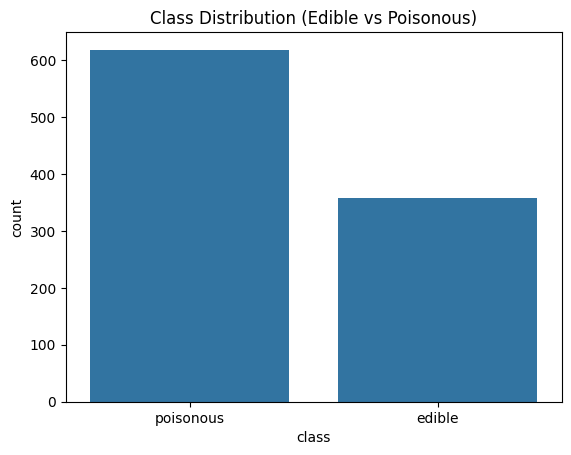

In [ ]:
# Class distribution plot for target
sns.countplot(x='class', data=df)
plt.title("Class Distribution (Edible vs Poisonous)")
plt.show()

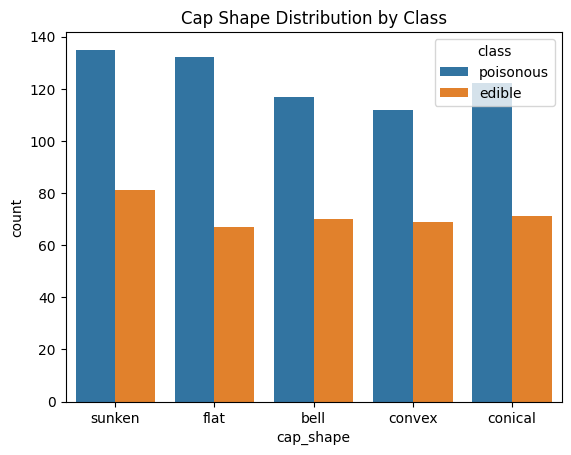

In [ ]:
# Histogram for one feature (cap-shape)
sns.countplot(x='cap_shape', hue='class', data=df)
plt.title("Cap Shape Distribution by Class")
plt.show()

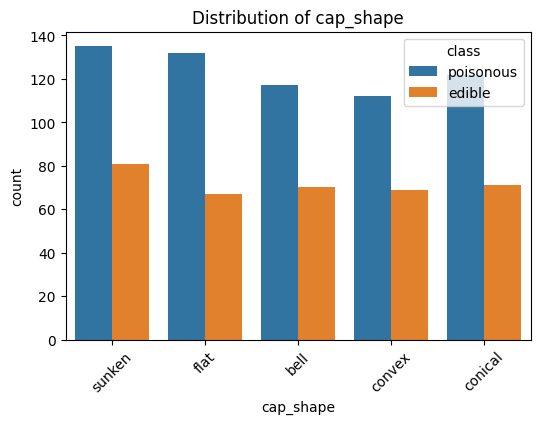

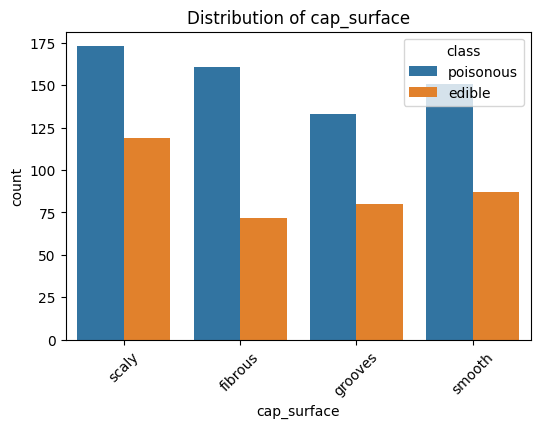

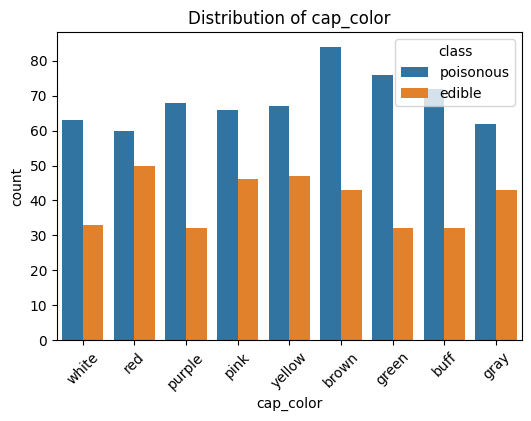

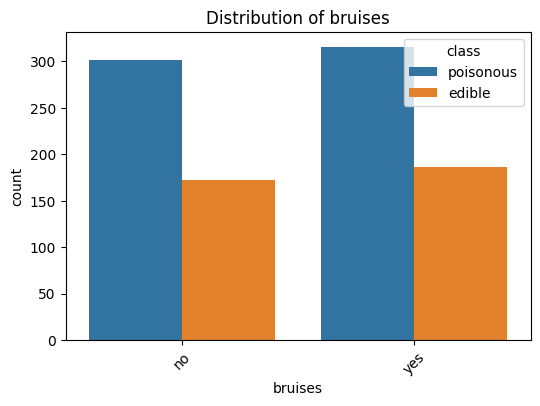

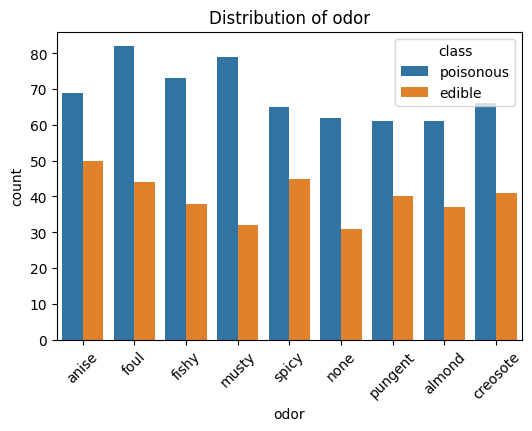

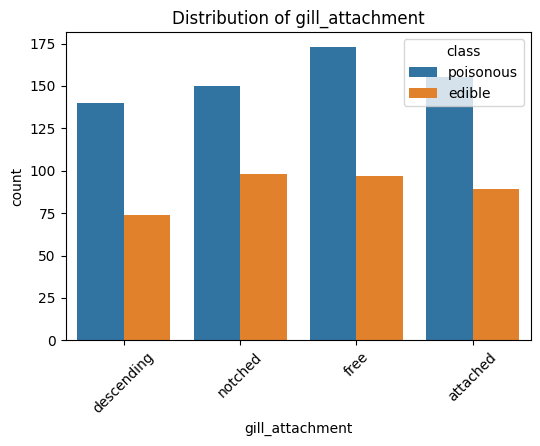

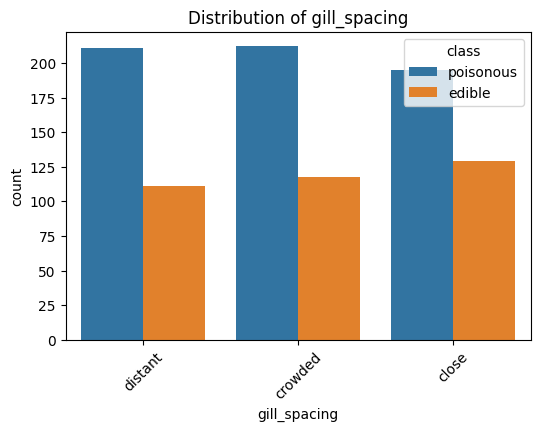

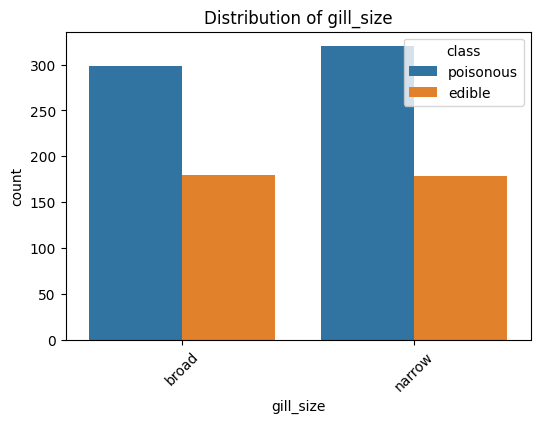

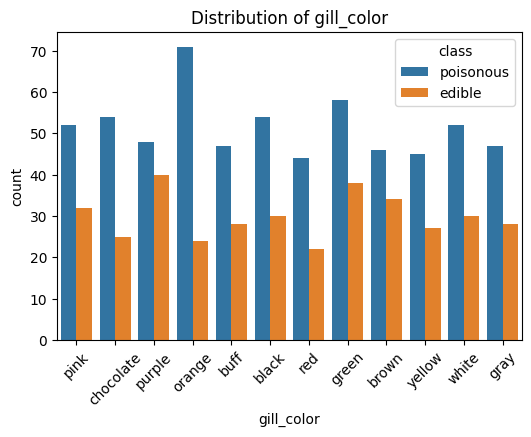

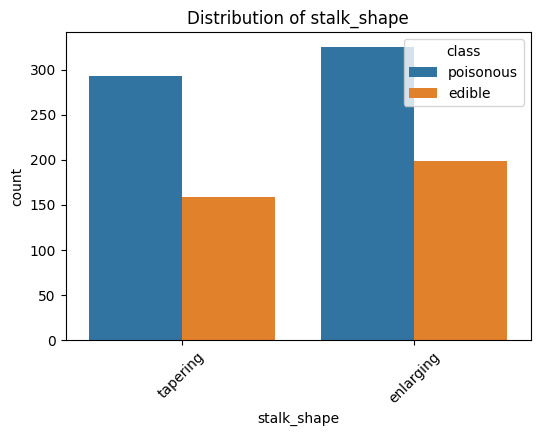

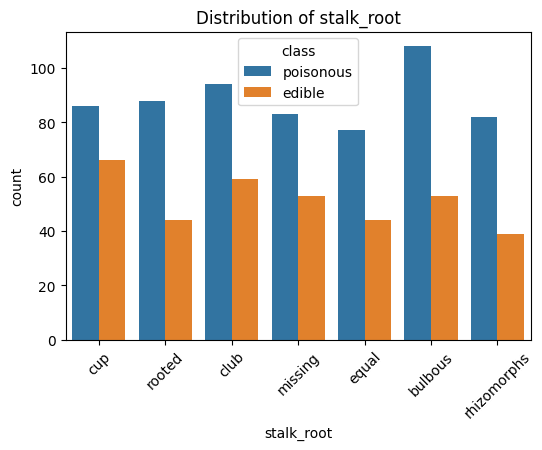

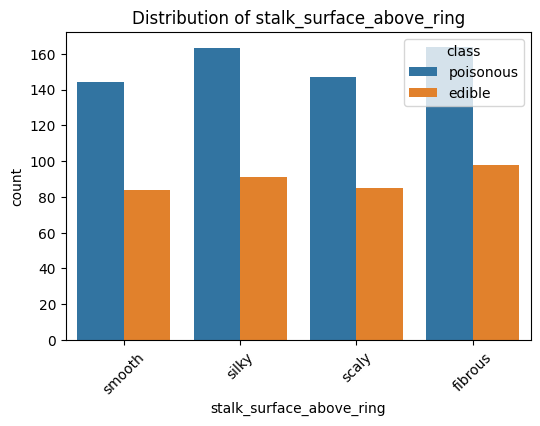

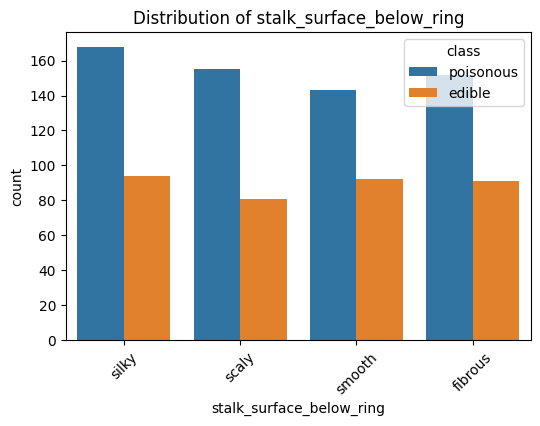

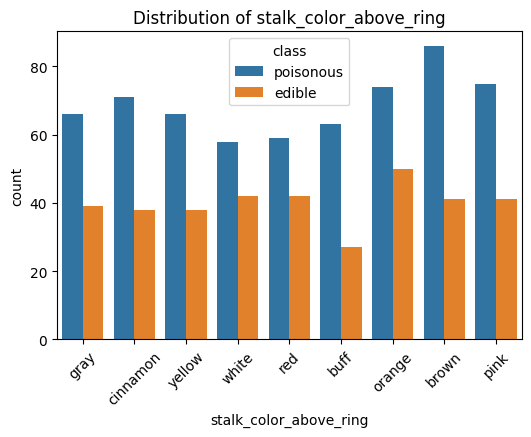

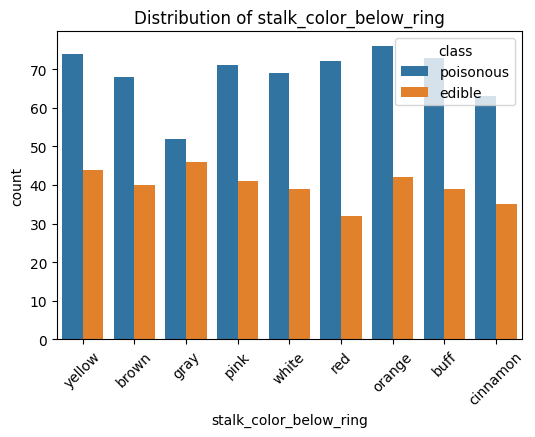

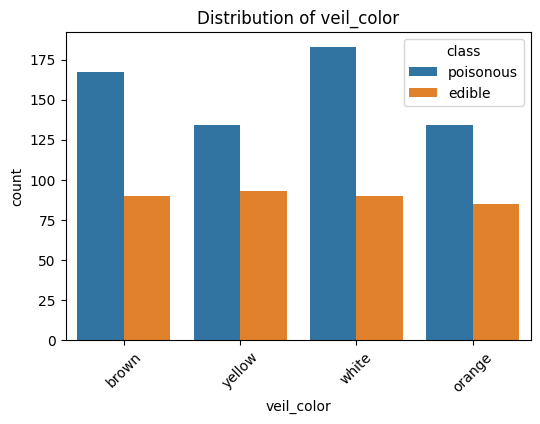

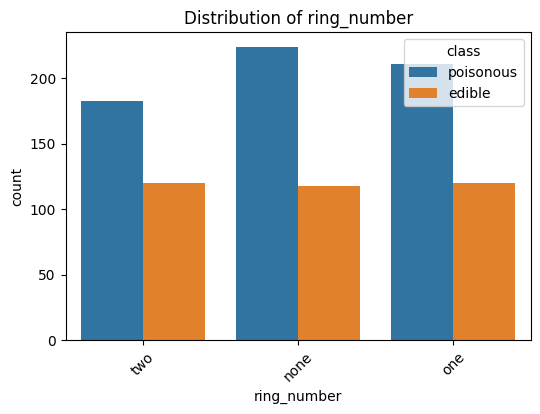

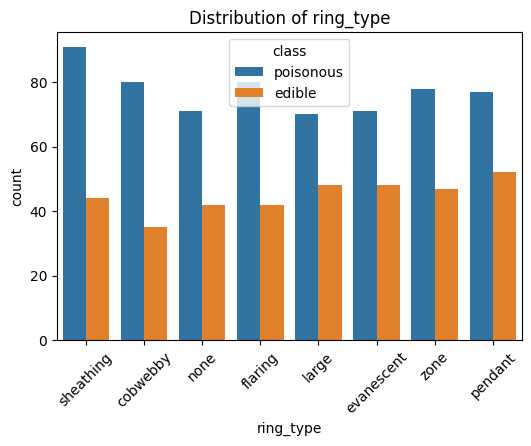

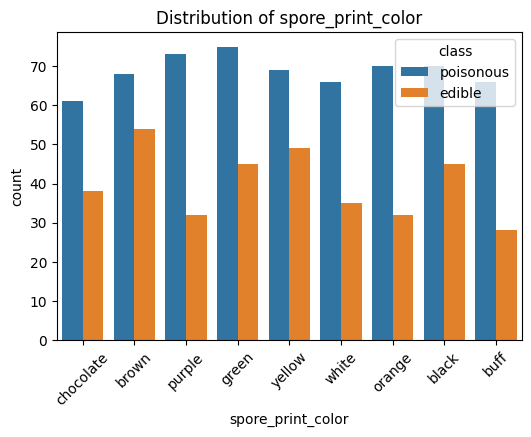

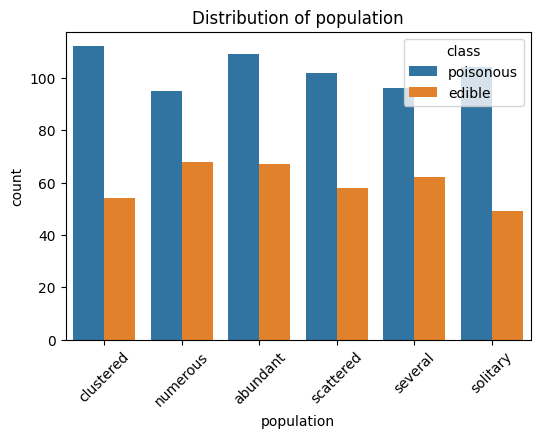

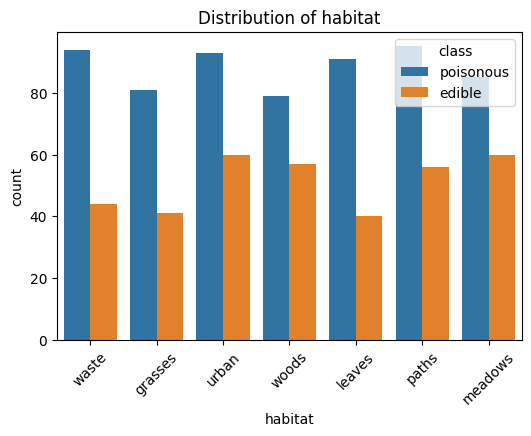

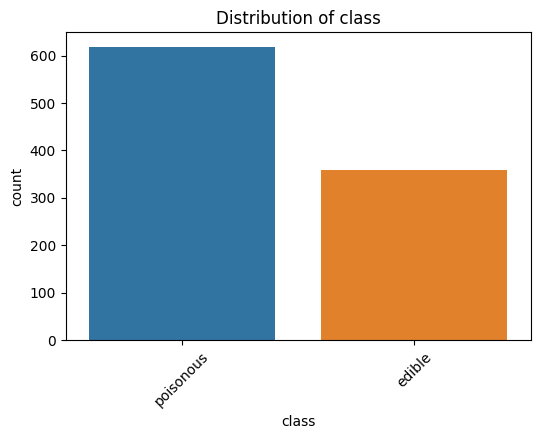

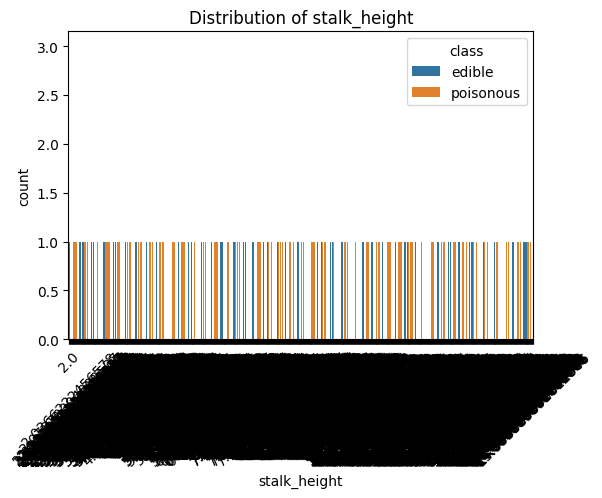

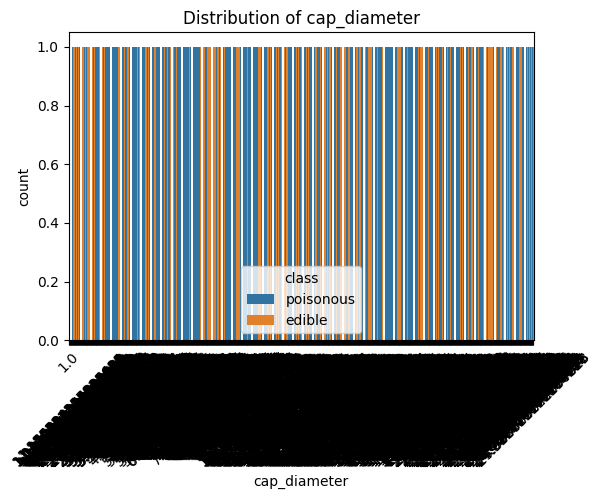

In [ ]:
for col in df.columns: #histogram for all features
  plt.figure(figsize=(6,4))
  sns.countplot(x=col, data=df, hue='class') # hue='class' to compare edible vs poisonous
  plt.title(f"Distribution of {col}")
  plt.xticks(rotation=45)
  plt.show()

In [ ]:
# Encode categorical variables
df_enc = df.apply(LabelEncoder().fit_transform)

In [ ]:
# Features (X) and Target (y)
X = df_enc.drop('class', axis=1)
y = df_enc['class']

<Axes: >

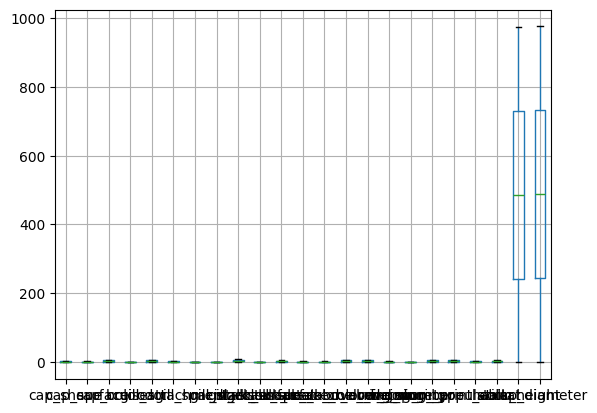

In [ ]:
X.boxplot() #no outliers found

Task 3: Data Visualization


1.	Employ scatter plots, pair plots, or relevant visualizations to comprehend feature distributions and relationships.


2.	Visualize class distributions to gauge dataset balance or imbalance.


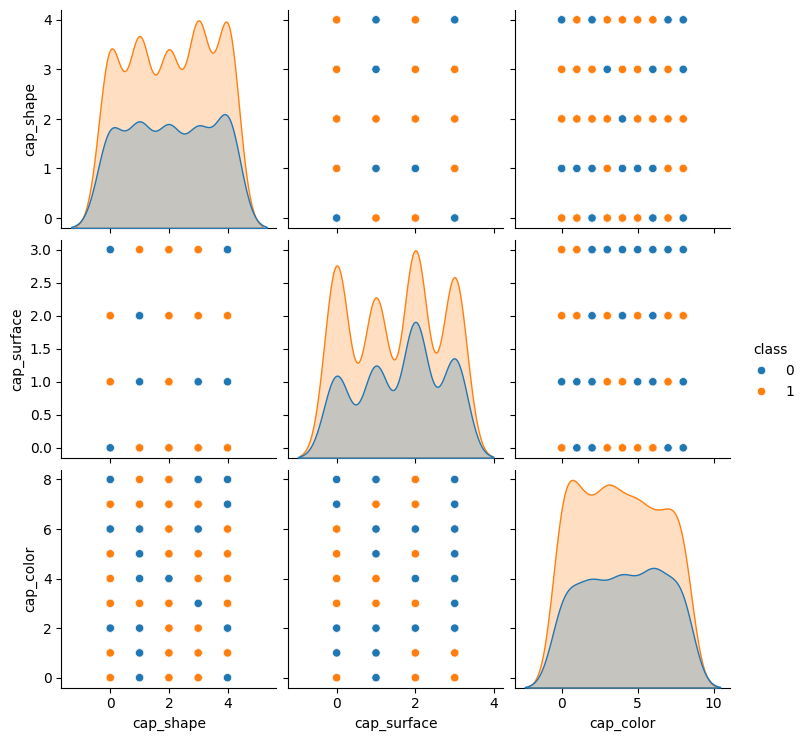

In [ ]:
# Pairplot (only 3 features to keep simple)
sns.pairplot(df_enc[['class','cap_shape','cap_surface','cap_color']], hue="class")
plt.show()

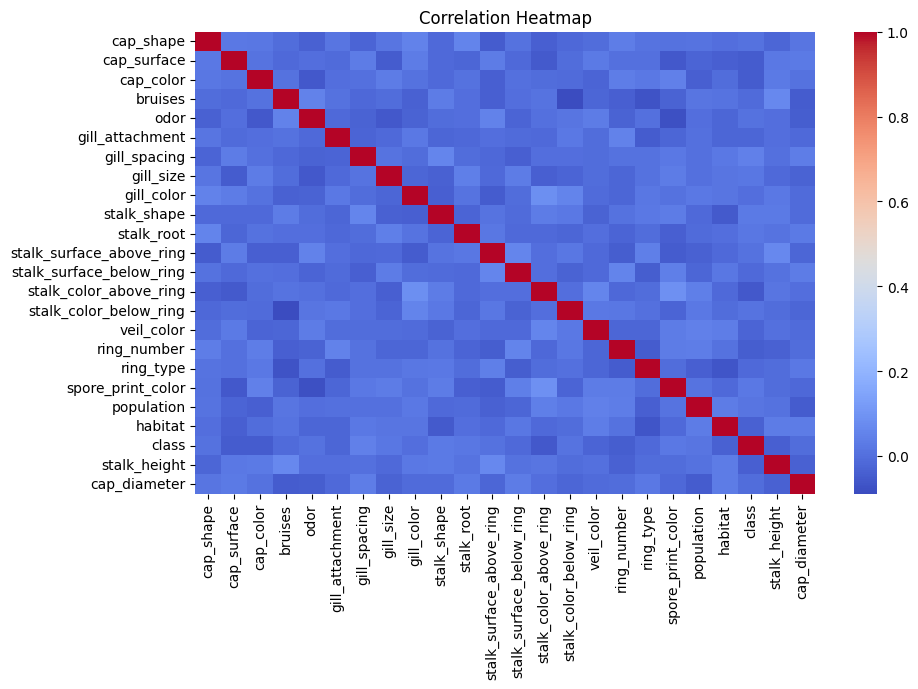

In [ ]:
# Heatmap for correlation
plt.figure(figsize=(10,6))
sns.heatmap(df_enc.corr(), cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

Task 2: Data Preprocessing


1.	Encode categorical variables if necessary.
2.	Split the dataset into training and testing sets.


In [ ]:
#split the dataset for train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=42)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(732, 23)
(244, 23)
(732,)
(244,)


In [ ]:
# Balance data using SMOTE
smote = SMOTE(random_state=100)
X_bal, y_bal = smote.fit_resample(X_train, y_train)

In [ ]:
print(X_bal.shape)
print(y_bal.shape)#shape after balancing

(928, 23)
(928,)


Task 4: SVM Implementation

1.	Implement a basic SVM classifier using Python libraries like scikit-learn.

2.	Train the SVM model on the training data.

3.	Evaluate model performance on the testing data using appropriate metrics (e.g., accuracy, precision, recall, F1-score).


In [ ]:
# Train basic SVM model (Linear Kernel)
svm_model = SVC(kernel='linear', class_weight='balanced')
svm_model.fit(X_bal, y_bal)

SVC(class_weight='balanced', kernel='linear')

In [ ]:
# Predict
y_pred = svm_model.predict(X_test)
y_pred

array([1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 0])

In [ ]:
# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\n Confusion Matrix:\n", confusion_matrix(y_test, y_pred)) #linear kernel giving 54% accuracy

Accuracy: 0.5409836065573771

Classification Report:
               precision    recall  f1-score   support

           0       0.39      0.42      0.40        90
           1       0.64      0.61      0.63       154

    accuracy                           0.54       244
   macro avg       0.52      0.52      0.52       244
weighted avg       0.55      0.54      0.54       244


 Confusion Matrix:
 [[38 52]
 [60 94]]


Task 5: Visualization of SVM Results
1.	Visualize classification results on the testing data.


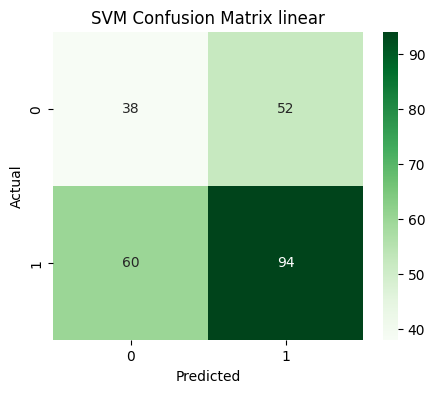

In [ ]:
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Greens')
plt.title("SVM Confusion Matrix linear")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [ ]:
# for easy plotting in class use df
y_pred_df = pd.DataFrame(y_pred, columns=['Predicted_Class'])

/tmp/ipython-input-1967126600.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Predicted_Class', data=y_pred_df, palette='Set2')


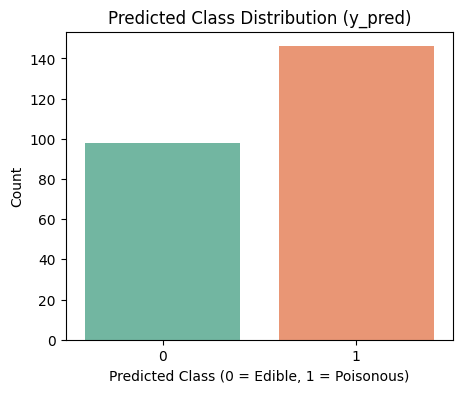

Class distribution in predictions:
Predicted_Class
1    146
0     98
Name: count, dtype: int64


In [ ]:
plt.figure(figsize=(5,4))
sns.countplot(x='Predicted_Class', data=y_pred_df, palette='Set2')
plt.title("Predicted Class Distribution (y_pred)")
plt.xlabel("Predicted Class (0 = Edible, 1 = Poisonous)")
plt.ylabel("Count")
plt.show()
##print counts
print("Class distribution in predictions:")
print(y_pred_df['Predicted_Class'].value_counts())

Task 6: Parameter Tuning and Optimization


1.	Experiment with different SVM hyperparameters (e.g., kernel type, regularization parameter) to optimize performance.


In [ ]:
param_grid = {
    'C': [0.1, 1, 10],
    # 'kernel': ['linear', 'poly', 'rbf'],
    'gamma': ['scale', 'auto']
}

In [ ]:
grid = GridSearchCV(SVC(class_weight='balanced'), param_grid, refit=True, verbose=1)
grid.fit(X_bal, y_bal)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(estimator=SVC(class_weight='balanced'),
             param_grid={'C': [0.1, 1, 10], 'gamma': ['scale', 'auto']},
             verbose=1)

In [ ]:
print("Best Parameters:", grid.best_params_)

Best Parameters: {'C': 10, 'gamma': 'auto'}


In [ ]:
# Predict with best model
best_model = grid.best_estimator_
y_pred_grid = best_model.predict(X_test)
y_pred_grid

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [ ]:
print("\nClassification Report (Best Model):\n", classification_report(y_test, y_pred_grid)) #it is giving 63 % accura


Classification Report (Best Model):
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        90
           1       0.63      0.99      0.77       154

    accuracy                           0.63       244
   macro avg       0.31      0.50      0.39       244
weighted avg       0.40      0.63      0.49       244



In [ ]:
''' it is giving 63% accuracy but shows overfitting'''

Task 7: Comparison and Analysis


1.	Compare SVM performance with various kernels (e.g., linear, polynomial, radial basis function).


2.	Analyze SVM strengths and weaknesses for the Mushroom dataset based on EDA and visualization results.


3.	Discuss practical implications of SVM in real-world classification tasks.


In [ ]:
#  Polynomial Kernel
svm_poly = SVC(kernel='poly', degree=3, class_weight='balanced', random_state=100)
svm_poly.fit(X_bal, y_bal)

In [ ]:
y_pred_poly = svm_poly.predict(X_test)
y_pred_poly

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 1])

In [ ]:
# Evaluate
print("Polynomial Kernel Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_poly))
print(classification_report(y_test, y_pred_poly)) ### Polynomial gave 60%

Polynomial Kernel Results:
Accuracy: 0.6024590163934426
              precision    recall  f1-score   support

           0       0.44      0.31      0.37        90
           1       0.66      0.77      0.71       154

    accuracy                           0.60       244
   macro avg       0.55      0.54      0.54       244
weighted avg       0.58      0.60      0.58       244



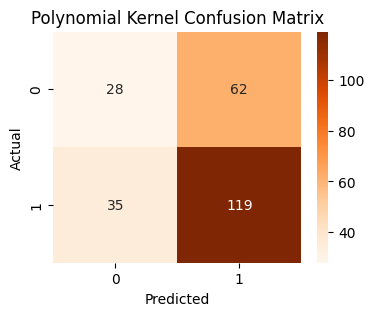

In [ ]:
# Confusion Matrix
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, y_pred_poly), annot=True, fmt='d', cmap='Oranges')
plt.title("Polynomial Kernel Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
# Convert predictions to DataFrame for easy plotting
y_pred_poly1 = pd.DataFrame(y_pred_poly, columns=['Predicted_Class'])

/tmp/ipython-input-3492807900.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Predicted_Class', data=y_pred_poly1, palette='Set2')


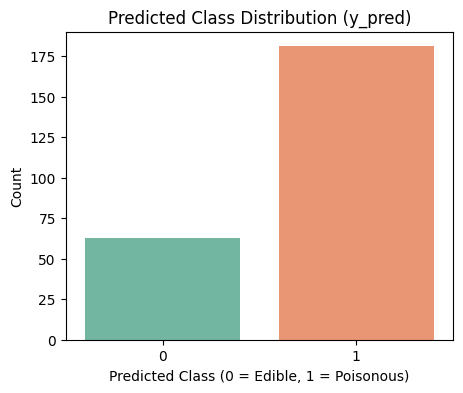

Class distribution in predictions:
Predicted_Class
1    181
0     63
Name: count, dtype: int64


In [ ]:
plt.figure(figsize=(5,4))
sns.countplot(x='Predicted_Class', data=y_pred_poly1, palette='Set2')
plt.title("Predicted Class Distribution (y_pred)")
plt.xlabel("Predicted Class (0 = Edible, 1 = Poisonous)")
plt.ylabel("Count")
plt.show()
##print counts
print("Class distribution in predictions:")
print(y_pred_poly1['Predicted_Class'].value_counts())

In [ ]:
# RBF Kernel
svm_rbf = SVC(kernel='rbf', class_weight='balanced', random_state=100)
svm_rbf.fit(X_bal, y_bal)

SVC(class_weight='balanced', random_state=100)

In [ ]:
y_pred_rbf = svm_rbf.predict(X_test)
y_pred_rbf

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 0])

In [ ]:
# Evaluate
print("RBF Kernel Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_rbf))
print(classification_report(y_test, y_pred_rbf)) #it is 58% accuracy

RBF Kernel Results:
Accuracy: 0.5778688524590164
              precision    recall  f1-score   support

           0       0.42      0.37      0.39        90
           1       0.65      0.70      0.68       154

    accuracy                           0.58       244
   macro avg       0.54      0.53      0.53       244
weighted avg       0.57      0.58      0.57       244



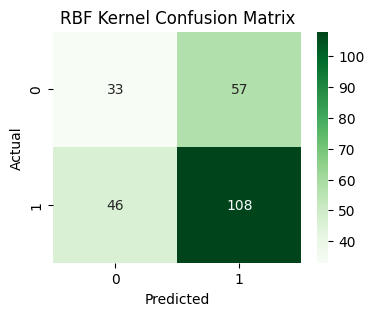

In [ ]:
# Confusion Matrix
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, y_pred_rbf), annot=True, fmt='d', cmap='Greens')
plt.title("RBF Kernel Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
# Convert predictions to DataFrame for easy plotting
y_pred_rbf1 = pd.DataFrame(y_pred_rbf, columns=['Predicted_Class'])

/tmp/ipython-input-3984708992.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Predicted_Class', data=y_pred_rbf1, palette='Set2')


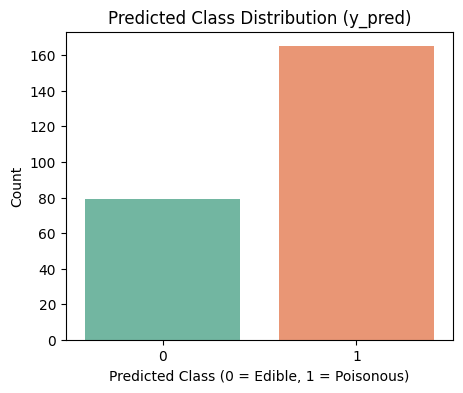

Class distribution in predictions:
Predicted_Class
1    165
0     79
Name: count, dtype: int64


In [ ]:
plt.figure(figsize=(5,4))
sns.countplot(x='Predicted_Class', data=y_pred_rbf1, palette='Set2')
plt.title("Predicted Class Distribution (y_pred)")
plt.xlabel("Predicted Class (0 = Edible, 1 = Poisonous)")
plt.ylabel("Count")
plt.show()
##print counts
print("Class distribution in predictions:")
print(y_pred_rbf1['Predicted_Class'].value_counts())

In [58]:
''' Linear Kernel Analysis:
- Works well if the dataset is linearly separable.
- Often simple and fast to train.
- For mushrooms, data is categorical and non-linear.
So, performance might not be the best here.

 Polynomial Kernel Analysis:
- Captures curved or complex boundaries.
- Can model non-linear patterns in the mushroom dataset.
 But if 'degree' is too high, it might overfit and increase computation time.

  RBF Kernel Analysis:
- Best for non-linear, complex datasets like mushrooms.
- Handles interactions between categorical features effectively.
 May need tuning of 'C' and 'gamma' to avoid overfitting.
'''

''' By comparing all Polynomial giving 60% accuracy then linear, rbf
 but however polynomial may be producing overfitting so, rbf performing overall good '''

' By comparing all Polynomial giving 60% accuracy then linear, rbf\n but however polynomial may be producing overfitting so, rbf performing overall good '


2.	Analyze SVM strengths and weaknesses for the Mushroom dataset based on EDA and visualization results.

In [ ]:
''' Strength:
The SVM model, regardless of the kernel used (linear, RBF, or polynomial),
achieved a high recall for the 'poisonous' class (class 1).
This means it correctly identified almost all of the poisonous mushrooms in the test set.

Weekness:
 The SVM model has a very low precision for the 'edible' class (class 0) and a precision of 0.00 for class 0.
 This indicates that when the model predicts a mushroom is edible, it is often incorrect.
 It is misclassifying a significant number of poisonous mushrooms as edible.

 The accuracy is only 63%, which is not very high.
  This is directly related to the poor performance on the 'edible' class.
The confusion matrix clearly shows that the model is predicting almost all instances as 'poisonous' (class 1),
leading to a high number of false positives for the 'edible' class.'''

" Strength: \nThe SVM model, regardless of the kernel used (linear, RBF, or polynomial), \nachieved a high recall for the 'poisonous' class (class 1). \nThis means it correctly identified almost all of the poisonous mushrooms in the test set.\n \nWeekness:\n The SVM model has a very low precision for the 'edible' class (class 0) and a precision of 0.00 for class 0. \n This indicates that when the model predicts a mushroom is edible, it is often incorrect. \n It is misclassifying a significant number of poisonous mushrooms as edible.\n \n The accuracy is only 63%, which is not very high.\n  This is directly related to the poor performance on the 'edible' class.\nThe confusion matrix clearly shows that the model is predicting almost all instances as 'poisonous' (class 1), \nleading to a high number of false positives for the 'edible' class."

3.	Discuss practical implications of SVM in real-world classification tasks.

In [ ]:
''' Effective in high-dimensional spaces:
        SVMs are particularly effective in datasets with a large number of features,
        even if the number of samples is relatively small.

  The ability to use different kernel functions allows SVMs to model non-linear relationships between features,
  expanding their applicability to complex problems.

  SVMs are less sensitive to outliers compared to other models like logistic regression,
  as their decision boundary is determined by the support vectors, which are typically not outliers.

SVM is mostly used for classification tasks such as image and speech recognition
Image recognition: Classifying images into different categories.
Text classification: Spam detection, sentiment analysis, topic modeling.
speech recognition: Recognizing spoken words or phrases.'''

' Effective in high-dimensional spaces:\n        SVMs are particularly effective in datasets with a large number of features,\n        even if the number of samples is relatively small.\n    \n  The ability to use different kernel functions allows SVMs to model non-linear relationships between features,\n  expanding their applicability to complex problems.\n\n  SVMs are less sensitive to outliers compared to other models like logistic regression, \n  as their decision boundary is determined by the support vectors, which are typically not outliers.\n\nSVM is mostly used for classification tasks such as image and speech recognition\nImage recognition: Classifying images into different categories.\nText classification: Spam detection, sentiment analysis, topic modeling.\nspeech recognition: Recognizing spoken words or phrases.'